In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# here we define our document collection which contains 5 documents
# this is an array of strings
documents = ["Euler is the father of graph theory",
             "Graph theory studies the properties of graphs",
             "Graph theory is cool!",
             "DNA sequences are very complex biological structures",
             "Genes are biological structures that are parts of a DNA sequence",
             "Genes are very important biological structures"]

# create the tf-idf vectors of the document collection
tfidf_vectorizer = TfidfVectorizer()

In [3]:
## TODO: get the matrix
A = tfidf_vectorizer.fit_transform(documents).todense()

In [4]:
# apply Singular Value Decomposition
U, S, V = np.linalg.svd(A)
print(U.shape)
print(S.shape)
print(V.shape)

print(S)

print(V.transpose())
# this is the original matrix
print(A)

# keep the first two rows of V
V2 = V[:2,:]
print(V2)

(6, 6)
(6,)
(23, 23)
[1.39705359 1.32700938 0.86555187 0.75369242 0.70480403 0.68797263]
[[-4.65004337e-01 -1.36298653e-01  1.90988457e-02  1.72040443e-01
   9.87225531e-03  9.23005948e-02 -3.64008110e-01 -2.99550421e-01
  -1.78257697e-01  1.24156580e-01 -2.89910805e-01 -3.12948751e-01
  -2.18244391e-01 -7.53882143e-02  1.24156580e-01 -7.53882143e-02
   1.59239688e-02 -2.41876687e-01  1.24156580e-01 -7.53882143e-02
  -1.96681686e-01 -1.78257697e-01 -2.24673125e-01]
 [-3.65742595e-01 -1.15701433e-01 -3.09851411e-02 -5.77180559e-02
  -4.26982072e-02 -4.58275691e-02  2.16075009e-01 -1.49125056e-03
  -1.14000365e-01 -4.55169192e-01  1.18110088e-02  2.38216717e-01
  -1.74963797e-01 -1.36295754e-02 -4.55169192e-01 -1.36295754e-02
  -1.08551193e-01 -7.64103558e-02 -4.55169192e-01 -1.36295754e-02
  -1.96060650e-01 -1.14000365e-01 -7.93283352e-02]
 [-1.77652719e-01 -6.38186959e-02 -6.56362678e-02 -3.79823048e-01
   3.16103169e-01  1.07809095e-01  6.84656082e-02  2.73079629e-01
  -1.25573730e-01

In [5]:
# the matrix after dimensionality reduction
## TODO: get the M matrix
M = np.dot(A, V.transpose())
print(M)

[[-2.58241928e-01  7.99618659e-01 -3.41753814e-02  1.42039041e-01
   3.20452407e-01 -4.12175104e-01 -1.15090959e-16 -2.42782104e-17
  -7.34596493e-17  2.64109622e-17 -9.56660937e-17 -1.01905134e-16
  -7.30078585e-17 -1.70055125e-17  2.73347473e-17 -1.48088964e-17
   7.67239687e-18 -6.20876628e-17 -1.42986162e-17 -1.13394495e-17
  -5.08212564e-17 -8.73374371e-17 -8.43981218e-17]
 [-2.29761475e-01  6.80222293e-01  6.13143112e-01 -2.23124676e-01
  -1.85730505e-01  1.55828047e-01  6.29362734e-17  2.92146157e-17
  -1.76620229e-17 -1.26467950e-16  1.54455809e-17  3.21688293e-17
   1.21822096e-17  3.27942150e-18 -1.74259560e-16  2.00298487e-19
  -4.04277527e-17 -1.41941535e-17 -1.81198454e-16  3.66974544e-18
  -1.04666249e-16 -3.84787046e-17 -1.84999693e-18]
 [-1.87865200e-01  7.16841621e-01 -5.76421706e-01 -1.61532710e-02
  -1.96294847e-01  2.82471555e-01 -2.04223164e-18  8.11444271e-17
  -7.63239068e-17  2.81612963e-17  5.73367672e-17 -1.97291352e-17
  -2.04876705e-17  4.76688913e-17  2.020

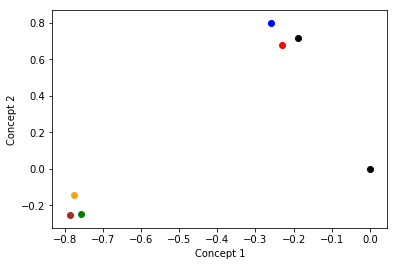

Comment: We can see that 2 clusters emerge, surely corresponding to the 2 topics of Graph Theroy and Bioinformatics


In [6]:
# plot the results
colors = ['blue','red','black','green','orange','brown']
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(6):
    ax.scatter(M[i,0],M[i,1], color=colors[i])
ax.scatter(0,0,color='black')
plt.xlabel('SVD1')
plt.xlabel('Concept 1')
plt.ylabel('Concept 2')
plt.show()

print("""Comment: We can see that 2 clusters emerge, surely corresponding to the 2 topics of Graph Theroy and Bioinformatics""")